In [12]:
# !pip install sklearn

In [23]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
# Create class color to bold text
class color():
    BOLD = '\033[1m'
    END = '\033[0m'

In [90]:
# Read the data and show the first 5 lines of the data
df = pd.read_csv('./detections/detectionToiletEven.csv')

header = []

# Set header
txtFile = './data/labels/coco.names'
with open(txtFile,'r') as file1:
    for line in file1:
        line = line[:-1]
        header.append(line)
header.append('Classification')

df.columns = header
detection_data = df.values
df

,person,bicycle,car,motorbike,aeroplane,bus,train,truck,boat,traffic light,...,sink,refrigerator,book,clock,vase,scissors,teddy bear,hair drier,toothbrush,Classification
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,livingRoom
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,livingRoom
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,livingRoom
3,3,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,livingRoom
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,livingRoom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,toilet
1035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,toilet
1036,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,toilet
1037,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,toilet


In [91]:
# Load the features (X)  
X = np.float64(detection_data[:,0:80])
#Load the target (Y)
y = detection_data[:,80]

In [92]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [93]:
y

array([' livingRoom', ' livingRoom', ' livingRoom', ..., ' toilet',
       ' toilet', ' toilet'], dtype=object)

In [94]:
#Perform label encoding on the target y to convert the string to numeric class
encode = LabelEncoder()
y = encode.fit_transform(y)

print(y)

[0 0 0 ... 1 1 1]


In [95]:
# #Perform label encoding on the target y to convert the string to numeric class
# encode = LabelEncoder()
# y = encode.fit_transform(y)

#shuffle then split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

#Perform standadization on the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)


 ##### 300-fold Cross Validation #######

iteration 1 - Accuracy = 1.0
iteration 2 - Accuracy = 0.6666666666666666
iteration 3 - Accuracy = 1.0
iteration 4 - Accuracy = 1.0
iteration 5 - Accuracy = 1.0
iteration 6 - Accuracy = 0.6666666666666666
iteration 7 - Accuracy = 1.0
iteration 8 - Accuracy = 1.0
iteration 9 - Accuracy = 1.0
iteration 10 - Accuracy = 1.0
iteration 11 - Accuracy = 1.0
iteration 12 - Accuracy = 1.0
iteration 13 - Accuracy = 1.0
iteration 14 - Accuracy = 0.6666666666666666
iteration 15 - Accuracy = 0.6666666666666666
iteration 16 - Accuracy = 1.0
iteration 17 - Accuracy = 1.0
iteration 18 - Accuracy = 1.0
iteration 19 - Accuracy = 1.0
iteration 20 - Accuracy = 0.6666666666666666
iteration 21 - Accuracy = 1.0
iteration 22 - Accuracy = 1.0
iteration 23 - Accuracy = 1.0
iteration 24 - Accuracy = 1.0
iteration 25 - Accuracy = 1.0
iteration 26 - Accuracy = 1.0
iteration 27 - Accuracy = 1.0
iteration 28 - Accuracy = 1.0
iteration 29 - Accuracy = 1.0
iteration 30 - Accura

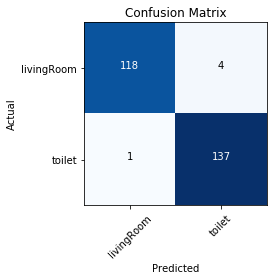


#### Detection Data Learning Curve ####



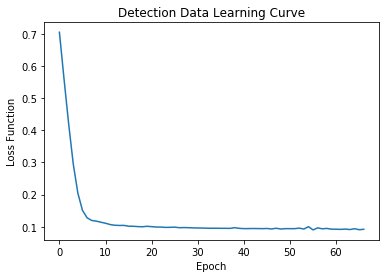

In [97]:
# Define the MLPClassifier , with 3 layer and the same amount of neurons of 12 with the max epoch of 400
mlp = MLPClassifier(alpha=0.1, random_state=1, hidden_layer_sizes=(12,12,12),
                    momentum=0.1, max_iter=400,learning_rate_init=0.01 )

# Fit the training set into the MLP model
mlp.fit(X_train_std,y_train)

cv_scores = cross_val_score(mlp,X_train_std, y_train, cv = 300)

print(color.BOLD +'\n ##### 300-fold Cross Validation #######\n'+color.END)
for i in range (cv_scores.size):
    print(f"iteration {i+1} - Accuracy = {cv_scores[i]}")
    
print("\n")
print(f"Mean accuracy is {cv_scores.mean()}")
# Testing / Predict with the testing set using the trained model
predictions = mlp.predict(X_test_std)

print(color.BOLD +'\n#### Classification report ####\n'+color.END)

# Show the classification report
print(classification_report(y_test,predictions))

# Define classnames
# EncodedClass = [0, 1, 2]
# DecodedClass = ['cafe','library','livingRoom']
EncodedClass = [0, 1]
DecodedClass = ['livingRoom','toilet']

# def to decode to print confusion matrix
def decode(value):
    value_cm = []

    for i in value:
        for j in EncodedClass:
            if i == EncodedClass[j]:
                value_cm.append(DecodedClass[j])
                
    return value_cm

y_test_cm = decode(y_test)
predictions_cm = decode(predictions)

##Call confusion matrix and assign to conf_matrix
conf_matrix = confusion_matrix(y_test_cm,predictions_cm,labels=DecodedClass)

# def to plot the confusion matrix
def plot_confusion_matrix(cnf_matrix,title,class_names,Ylabel,Xlabel,cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    fmt = 'd'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.ylabel(Ylabel)
    plt.xlabel(Xlabel)
    plt.tight_layout()
    plt.show()


#plot confusion matrix
print(color.BOLD +'\n#### Confusion Matrix ####\n'+color.END)
plot_confusion_matrix(cnf_matrix=conf_matrix,title = "Confusion Matrix",class_names=DecodedClass,\
                      Ylabel="Actual",Xlabel="Predicted")

# Plot loss curve for MLP and define the title, x and y axis
print(color.BOLD +'\n#### Detection Data Learning Curve ####\n'+color.END)
plt.figure()
plt.title('Detection Data Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss Function')
plt.plot(mlp.loss_curve_)
plt.show()